# Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading data into memory

In [2]:
feeder_2022 = pd.read_excel('data.xlsx', index_col='FEEDER')
feeder_2023 = pd.read_excel('data.xlsx', index_col='FEEDER', sheet_name='feeder_max_loading_2023')
outages_2022 = pd.read_excel('data.xlsx', index_col='Feeder', sheet_name='outages_2022')
outages_2023 = pd.read_excel('data.xlsx', index_col='Feeder', sheet_name='outages_2023')

In [3]:
consumption_2022_2023 = pd.read_excel('data.xlsx', index_col='MONTH', sheet_name='consumption_2022_2023')

## Preview Data

In [4]:
feeder_2022.columns

Index(['id', 'BSP', 'Alias', 'Take-Off Cable Size', 'Material', 'Voltage (kV)',
       'Ampacity (A)', 'Medium', 'Max Rating (MW)', 'JAN Demand_max (MW)',
       'JAN %Loading', 'FEB Demand_max (MW)', 'FEB %Loading',
       'MAR Demand_max (MW)', 'MAR %Loading', 'APR Demand_max (MW)',
       'APR %Loading', 'MAY Demand_max (MW)', 'MAY %Loading',
       'JUN Demand_max (MW)', 'JUN %Loading', 'JUL Demand_max (MW)',
       'JUL %Loading', 'AUG Demand_max (MW)', 'AUG %Loading',
       'SEP Demand_max (MW)', 'SEP %Loading', 'OCT Demand_max (MW)',
       'OCT %Loading', 'NOV Demand_max (MW)', 'NOV %Loading',
       'DEC Demand_max (MW)', 'DEC %Loading', 'Q1 Demand_max (MW)',
       'Q1 %Loading', 'Q2 Demand_max (MW)', 'Q2 %Loading',
       'Q3 Demand_max (MW)', 'Q3 %Loading', 'Q4 Demand_max (MW)',
       'Q4 %Loading', 'Annual Demand_max (MW)', 'Annual %Loading'],
      dtype='object')

In [5]:
feeder_2022

,id,BSP,Alias,Take-Off Cable Size,Material,Voltage (kV),Ampacity (A),Medium,Max Rating (MW),JAN Demand_max (MW),...,Q1 Demand_max (MW),Q1 %Loading,Q2 Demand_max (MW),Q2 %Loading,Q3 Demand_max (MW),Q3 %Loading,Q4 Demand_max (MW),Q4 %Loading,Annual Demand_max (MW),Annual %Loading
FEEDER,,,,,,,,,,,,,,,,,,,,,
28BF2,1,Tamale,Tamale,3cX185,Aluminium,11.5,240,Duct,4.302414,2.800,...,3.700,85.998229,3.900,90.646781,3.700,85.998229,3.200,74.376846,3.90,90.646781
28BF3,2,Tamale,Tamale,3cX185,Aluminium,11.5,240,Duct,4.302414,3.700,...,4.400,102.268164,4.600,106.916717,4.800,111.565269,4.300,99.943887,4.80,111.565269
28BF4,3,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,7.700,...,9.800,103.145249,7.800,82.095198,6.900,72.622675,7.300,76.832686,7.80,82.095198
28BF6,4,Tamale,Tamale,1cX500,Aluminium,11.5,430,Duct,7.708492,9.100,...,9.100,118.051622,3.000,38.918117,2.700,35.026306,2.600,33.729035,3.00,38.918117
28BF7,5,Tamale,Tamale,1cX500,Aluminium,11.5,430,Air,7.708492,6.300,...,8.600,111.565269,7.400,95.998023,6.500,84.322587,6.700,86.917128,7.40,95.998023
28BF8,6,Tamale,Tamale,3cX95,Aluminium,11.5,165,Air,2.957910,1.700,...,6.100,206.226710,2.200,74.376846,1.900,64.234549,1.800,60.853783,2.20,74.376846
28BF9,7,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,8.200,...,10.000,105.250254,8.000,84.200203,6.700,70.517670,7.100,74.727680,8.00,84.200203
28BF11,8,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,4.100,...,5.000,52.625127,5.200,54.730132,4.400,46.310112,4.000,42.100102,5.20,54.730132
28YF1,9,Tamale,Tamale,1cX240,Copper,34.5,380,Duct,20.436467,13.400,...,16.800,82.205988,16.600,81.227345,15.800,77.312774,17.000,83.184631,17.00,83.184631


## Analysis for 2023

### Feeder Analysis

In [8]:
feeder_2023['Voltage (kV)'] * feeder_2023['Ampacity (A)']

FEEDER
28BF2      2760.0
28BF3      2760.0
28BF4      6095.0
28BF6      4945.0
28BF7      4945.0
28BF8      1897.5
28BF9      6095.0
28BF11     6095.0
28YF1     13110.0
28YF2     13110.0
28YF8     13110.0
28YF9     13110.0
28YF10    13110.0
35YF1     13110.0
35YF2     13110.0
35YF3     13110.0
35YF4     13110.0
35YF5     13110.0
55YF1     13110.0
55YF2     13110.0
55YF3     13110.0
55YF4     13110.0
55YF5     13110.0
ADBF1      4370.0
NYBF1      3450.0
NYBF2      3450.0
NYBF3      3450.0
APBF1      3450.0
APBF2      3450.0
APBF3      3450.0
APYF1     10350.0
DLBF1      3450.0
DLBF2      3450.0
DLBF3      3450.0
HPBF1      3450.0
HPBF2      3450.0
HPBF5      3450.0
38YF4     13110.0
dtype: float64

In [6]:
cols = list(feeder_2023.columns)

In [7]:
cols

['id',
 'BSP',
 'Alias',
 'Size',
 'Material',
 'Voltage (kV)',
 'Ampacity (A)',
 'Medium',
 'Max Rating of Take-off Cable (MW)',
 'JAN Demand_max (MW)',
 'JAN %Loading',
 'FEB Demand_max (MW)',
 'FEB %Loading',
 'MAR Demand_max (MW)',
 'MAR %Loading',
 'APR Demand_max (MW)',
 'APR %Loading',
 'MAY Demand_max (MW)',
 'MAY %Loading',
 'JUN Demand_max (MW)',
 'JUN %Loading',
 'JUL Demand_max (MW)',
 'JUL %Loading',
 'AUG Demand_max (MW)',
 'AUG %Loading',
 'SEP Demand_max (MW)',
 'SEP %Loading',
 'OCT Demand_max (MW)',
 'OCT %Loading',
 'NOV Demand_max (MW)',
 'NOV %Loading',
 'DEC Demand_max (MW)',
 'DEC %Loading',
 'Q1 Demand_max (MW)',
 'Q1 %Loading',
 'Q2 Demand_max (MW)',
 'Q2 %Loading',
 'Q3 Demand_max (MW)',
 'Q3 %Loading',
 'Q4 Demand_max (MW)',
 'Q4 %Loading',
 'Annual Demand_max (MW)',
 'Annual %Loading']

In [144]:
for col in cols:
    print(col)

id
BSP
Alias
Size
Material
Voltage (kV)
Ampacity (A)
Medium
Max Rating of Take-off Cable (MW)
JAN Demand_max (MW)
JAN %Loading
FEB Demand_max (MW)
FEB %Loading
MAR Demand_max (MW)
MAR %Loading
APR Demand_max (MW)
APR %Loading
MAY Demand_max (MW)
MAY %Loading
JUN Demand_max (MW)
JUN %Loading
JUL Demand_max (MW)
JUL %Loading
AUG Demand_max (MW)
AUG %Loading
SEP Demand_max (MW)
SEP %Loading
OCT Demand_max (MW)
OCT %Loading
NOV Demand_max (MW)
NOV %Loading
DEC Demand_max (MW)
DEC %Loading
Q1 Demand_max (MW)
Q1 %Loading
Q2 Demand_max (MW)
Q2 %Loading
Q3 Demand_max (MW)
Q3 %Loading
Q4 Demand_max (MW)
Q4 %Loading
Annual Demand_max (MW)
Annual %Loading


In [8]:
heads = [head for head in cols if 'oading' in head]
loading = [head.split()[0] for head in cols if 'oading' in head]
loading

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Annual']

In [9]:
heads

['JAN %Loading',
 'FEB %Loading',
 'MAR %Loading',
 'APR %Loading',
 'MAY %Loading',
 'JUN %Loading',
 'JUL %Loading',
 'AUG %Loading',
 'SEP %Loading',
 'OCT %Loading',
 'NOV %Loading',
 'DEC %Loading',
 'Q1 %Loading',
 'Q2 %Loading',
 'Q3 %Loading',
 'Q4 %Loading',
 'Annual %Loading']

In [10]:
loads = {title: feeder_2023[key] for key, title in zip(heads, loading)}

In [11]:
loads = pd.DataFrame(loads)

In [12]:
loads

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Q1,Q2,Q3,Q4,Annual
FEEDER,,,,,,,,,,,,,,,,,
28BF2,69.728293,76.701123,83.673952,88.322505,90.646781,76.701123,69.728293,65.079740,83.673952,79.025399,81.349676,0,83.673952,90.646781,83.673952,81.349676,90.646781
28BF3,90.646781,99.943887,104.592440,113.889546,99.943887,97.619611,130.159481,120.862375,132.483757,134.110751,132.483757,0,104.592440,113.889546,132.483757,134.110751,134.110751
28BF4,83.147701,84.200203,84.200203,86.305208,85.252706,81.042696,76.832686,84.200203,81.042696,85.042205,84.200203,0,84.200203,86.305208,84.200203,85.042205,86.305208
28BF6,38.918117,37.620847,35.026306,35.026306,36.323576,32.431764,32.431764,32.431764,32.431764,35.026306,33.729035,0,38.918117,36.323576,32.431764,35.026306,36.323576
28BF7,83.025317,92.106211,97.295293,97.295293,98.592564,90.808940,84.322587,83.025317,92.106211,94.700752,103.781646,0,97.295293,98.592564,92.106211,103.781646,103.781646
28BF8,60.853783,60.853783,70.996081,77.757612,67.615315,64.234549,57.473018,60.853783,60.853783,182.561350,64.234549,0,70.996081,77.757612,60.853783,182.561350,182.561350
28BF9,74.727680,81.042696,82.095198,84.200203,82.095198,76.832686,74.727680,72.622675,99.987741,83.147701,85.252706,0,82.095198,84.200203,99.987741,85.252706,99.987741
28BF11,42.100102,42.100102,44.205107,45.257609,44.205107,43.152604,42.100102,38.942594,44.205107,44.099856,45.257609,0,44.205107,45.257609,44.205107,45.257609,45.257609
28YF1,82.205988,88.077844,89.056487,90.035130,89.545808,87.099202,86.609880,84.163273,88.077844,87.637455,88.077844,0,89.056487,90.035130,88.077844,88.077844,90.035130


#### Plots

In [44]:
# Set the style
sns.set(style="whitegrid")
colors = sns.color_palette("deep")

##### Descriptive plots

In [13]:
monthly_loads = loads[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV']]

In [14]:
quarterly_loads = loads[['Q1', 'Q2', 'Q3', 'Q4', 'Annual']]

In [15]:
mloads2 = monthly_loads.transpose(copy=True)
qloads2 = quarterly_loads.transpose(copy=True)

In [16]:
mloads2[['28YF8', '28YF9', '28YF10', '35YF1', '35YF2', '35YF3',
       '35YF4', '35YF5', '55YF1', '55YF2', '55YF3', '55YF4', '55YF5', 'ADBF1',
       'NYBF1', 'NYBF2', 'NYBF3', 'APBF1']].describe()

FEEDER,28YF8,28YF9,28YF10,35YF1,35YF2,35YF3,35YF4,35YF5,55YF1,55YF2,55YF3,55YF4,55YF5,ADBF1,NYBF1,NYBF2,NYBF3,APBF1
count,11.000000,11.000000,11.000000,9.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,12.624491,28.135978,16.636926,20.932080,12.553317,13.247264,23.576393,58.273725,2.658349,0.321217,4.802022,0.0,4.021777,92.348285,24.155571,14.371635,54.058444,61.698975
std,10.387106,17.259593,13.450553,1.843543,5.889542,6.836262,7.859111,22.759971,0.936426,0.119314,1.655879,0.0,2.563890,4.277525,2.613072,0.741182,12.612329,3.510140
min,0.831846,17.615569,0.000000,18.594212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83.673952,20.453633,13.629557,33.655523,55.782635
25%,2.471073,19.817515,0.000000,19.572854,11.156527,11.132061,25.200050,47.708832,2.625209,0.301177,4.922573,0.0,3.466842,92.481736,21.569285,13.936362,40.907265,59.501477
50%,19.572854,21.040818,25.934032,20.551497,11.254391,11.205459,25.934032,69.483633,2.828277,0.357205,5.079156,0.0,3.689483,92.481736,25.102186,13.945659,60.617130,61.360898
75%,19.572854,22.753443,27.646657,22.019461,14.679641,16.147605,26.423353,72.908882,3.077831,0.381671,5.624749,0.0,3.887658,94.683683,25.381099,14.689427,63.778146,64.150030
max,26.912675,63.122455,27.891317,23.976746,22.998104,23.976746,27.401996,73.887525,3.449716,0.445282,6.082264,0.0,10.960798,96.885629,27.891317,15.805080,65.079740,66.939162


In [17]:
qloads2

FEEDER,28BF2,28BF3,28BF4,28BF6,28BF7,28BF8,28BF9,28BF11,28YF1,28YF2,...,APBF2,APBF3,APYF1,DLBF1,DLBF2,DLBF3,HPBF1,HPBF2,HPBF5,38YF4
Q1,83.673952,104.592440,84.200203,38.918117,97.295293,70.996081,82.095198,44.205107,89.056487,8.807784,...,26.031896,3.718842,20.453633,0.0,0.0,0.0,0.0,0.0,0.0,6.459042
Q2,90.646781,113.889546,86.305208,36.323576,98.592564,77.757612,84.200203,45.257609,90.035130,8.807784,...,24.172475,7.437685,21.693247,0.0,0.0,0.0,0.0,0.0,0.0,6.361178
Q3,83.673952,132.483757,84.200203,32.431764,92.106211,60.853783,99.987741,44.205107,88.077844,8.807784,...,20.453633,9.297106,21.073440,0.0,0.0,0.0,0.0,0.0,0.0,6.459042
Q4,81.349676,134.110751,85.042205,35.026306,103.781646,182.561350,85.252706,45.257609,88.077844,8.122735,...,20.453633,9.297106,22.313054,0.0,0.0,0.0,0.0,0.0,0.0,6.507974
Annual,90.646781,134.110751,86.305208,36.323576,103.781646,182.561350,99.987741,45.257609,90.035130,8.807784,...,24.172475,9.297106,22.313054,0.0,0.0,0.0,0.0,0.0,0.0,6.507974


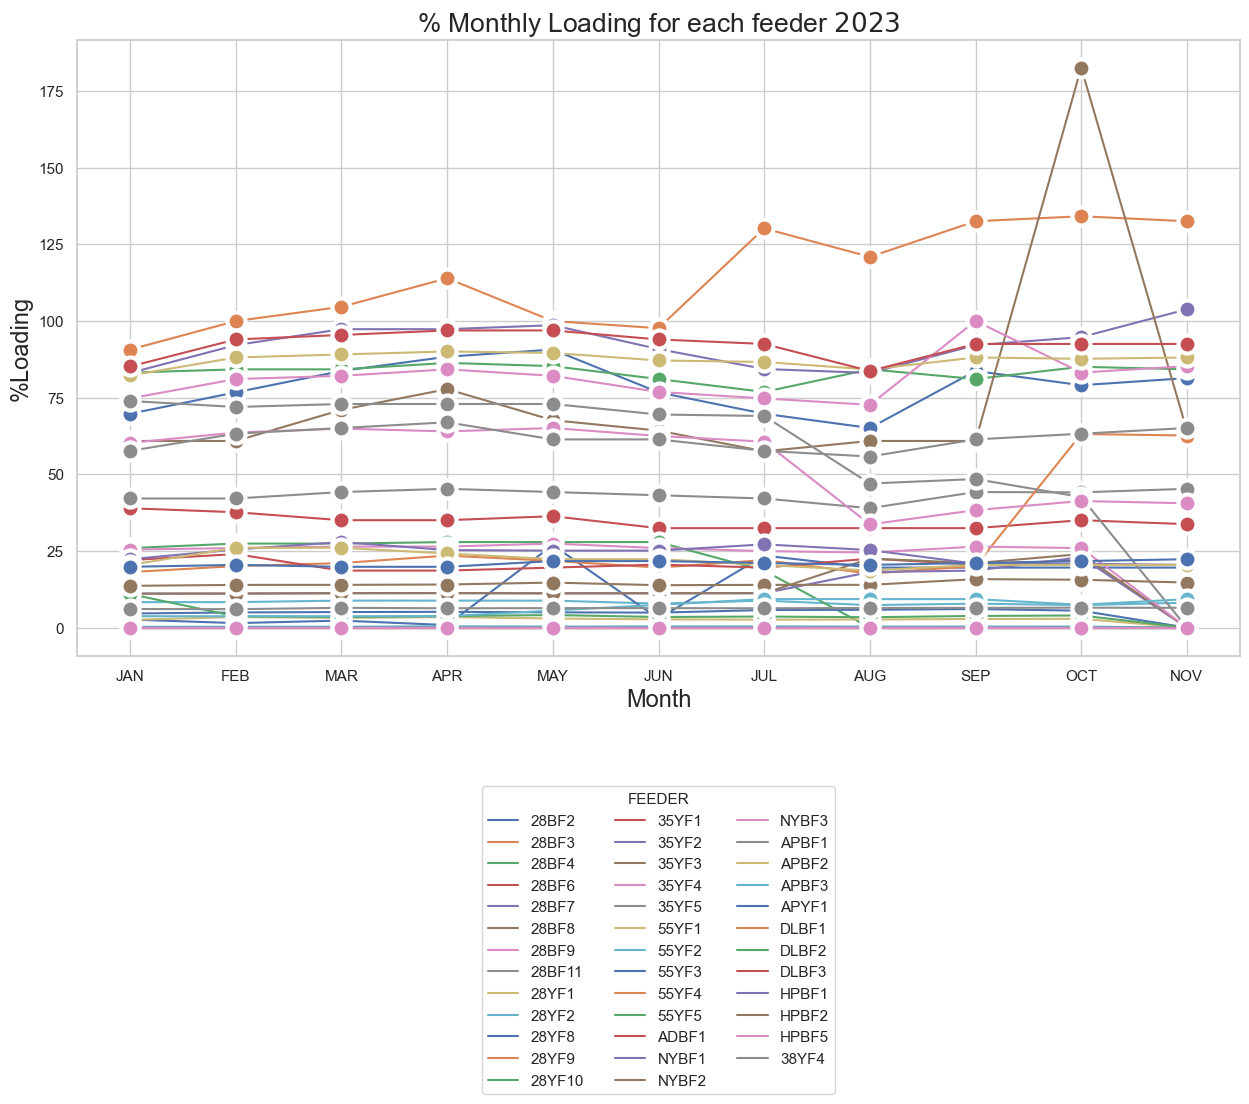

In [80]:
# Create line plots for mloads2
plt.figure(figsize=(15, 8))
sns.lineplot(#x='Month', 
             #y='%Loading', 
             #hue='Treatments',   
             dashes=False, 
             data=mloads2, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('% Monthly Loading for each feeder ${2023}$', size=19)
plt.xlabel('Month', size=17)
plt.ylabel('%Loading', size=17)
plt.legend(title='FEEDER', title_fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.savefig('monthly_feeder_loading_2023.png', dpi=450)
plt.show()

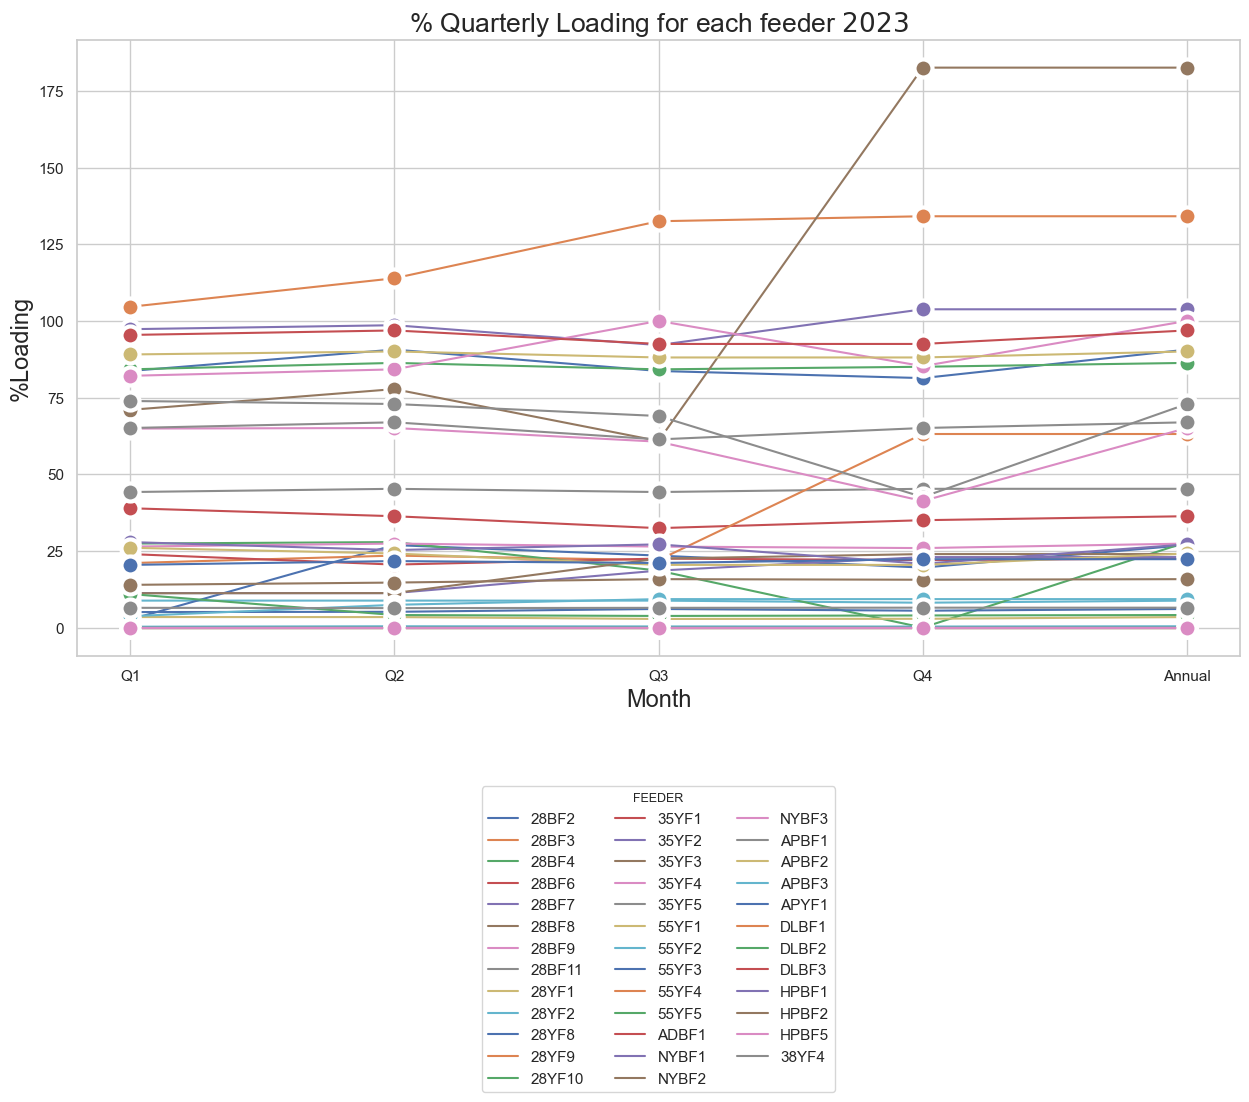

In [79]:
# Create line plots for mloads2
plt.figure(figsize=(15, 8))
sns.lineplot(#x='Month', 
             #y='%Loading', 
             #hue='Treatments',  
             dashes=False,
             data=qloads2, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('% Quarterly Loading for each feeder ${2023}$', size=19)
plt.xlabel('Month', size=17)
plt.ylabel('%Loading', size=17)
plt.legend(title='FEEDER', title_fontsize='9', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)


plt.savefig('quarterly_feeder_loading_2023.png', dpi=450)
plt.show()

##### Max plots

In [18]:
feeders = list(mloads2.columns)
maxs = []

In [19]:
for feeder in feeders:
    maxs.append(mloads2[feeder].max())

In [20]:
max_load_on_each_feeder = {"Feeder":feeders, "%Loading":maxs}
maxs_on_feeder = pd.DataFrame(max_load_on_each_feeder)
#maxs_on_feeder = maxs_on_feeder.set_index('Feeder')

In [21]:
maxs_on_feeder

,Feeder,%Loading
0,28BF2,90.646781
1,28BF3,134.110751
2,28BF4,86.305208
3,28BF6,38.918117
4,28BF7,103.781646
5,28BF8,182.561350
6,28BF9,99.987741
7,28BF11,45.257609
8,28YF1,90.035130
9,28YF2,8.807784


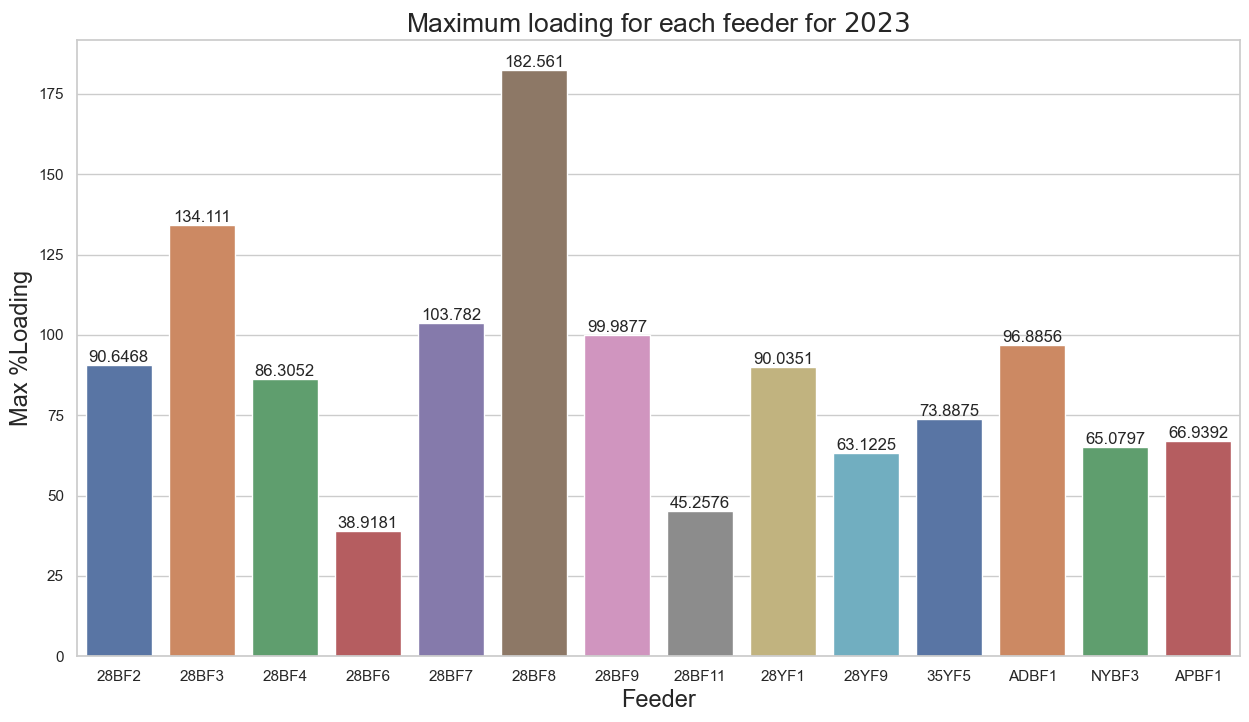

In [116]:
maxs_on_feeder = maxs_on_feeder[maxs_on_feeder['%Loading'] > 30]
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Feeder', y='%Loading', data=maxs_on_feeder, palette='deep')
ax.bar_label(ax.containers[0], fontsize=12);

plt.title('Maximum loading for each feeder for ${2023}$', size=19)
plt.xlabel('Feeder', size=17)
plt.ylabel('Max %Loading', size=17)

plt.savefig('maximum_loading_for_each_feeder_2023.png', dpi=450)
plt.show()

#### Excess loads to shed for 2023

In [167]:
feeder_max_23_beyond95 = maxs_on_feeder[maxs_on_feeder['%Loading'] > 95]

In [168]:
feeder_max_23_beyond95

,Feeder,%Loading
1,28BF3,134.110751
4,28BF7,103.781646
5,28BF8,182.561350
6,28BF9,99.987741
23,ADBF1,96.885629


In [156]:
demand = [demand for demand in cols if 'emand' in demand]
demand

['JAN Demand_max (MW)',
 'FEB Demand_max (MW)',
 'MAR Demand_max (MW)',
 'APR Demand_max (MW)',
 'MAY Demand_max (MW)',
 'JUN Demand_max (MW)',
 'JUL Demand_max (MW)',
 'AUG Demand_max (MW)',
 'SEP Demand_max (MW)',
 'OCT Demand_max (MW)',
 'NOV Demand_max (MW)',
 'DEC Demand_max (MW)',
 'Q1 Demand_max (MW)',
 'Q2 Demand_max (MW)',
 'Q3 Demand_max (MW)',
 'Q4 Demand_max (MW)',
 'Annual Demand_max (MW)']

In [157]:
demands = {title: feeder_2023[key] for key, title in zip(demand, loading)}

In [158]:
demands = pd.DataFrame(demands)

In [162]:
demands = demands.fillna('0.00')

For excess demands greater than 95%, we calculate the load that should be shed

In [163]:
monthly_demands = demands[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV']]
quarterly_demands = demands[['Q1', 'Q2', 'Q3', 'Q4', 'Annual']]

In [165]:
mdemands23 = monthly_demands.transpose()

In [170]:
demand_max_23_beyond95 = [mdemands23[mx].max() for mx in feeder_max_23_beyond95['Feeder']]

In [171]:
demand_max_23_beyond95

[5.77, 8.0, 5.4, 9.5, 6.6]

In [175]:
loading_max_23_beyond95 = list(feeder_max_23_beyond95['%Loading'])

In [176]:
loading_max_23_beyond95

[134.1107509349493,
 103.78164596151007,
 182.56134994138364,
 99.98774145112468,
 96.88562869696236]

In [181]:
# Evaluating the excess loads to be shed
load_to_be_shed_23 = []
for i in range(5):
    excess_loading = loading_max_23_beyond95[i]
    demand_at_excess = demand_max_23_beyond95[i]
    load_to_be_shed_23.append(((excess_loading - 95)/excess_loading) * demand_at_excess)

In [183]:
load_to_be_shed_23

[1.682706504298963,
 0.676932486868975,
 2.5899857217055375,
 0.47389353032687637,
 0.12845196514002435]

In [184]:
feeders_at_max_23 = list(feeder_max_23_beyond95['Feeder'])

In [185]:
feeders_at_max_23

['28BF3', '28BF7', '28BF8', '28BF9', 'ADBF1']

In [187]:
df_load_shed = {'Feeder':feeders_at_max_23, 'Shed Load (MW)':load_to_be_shed_23}
df_load_shed = pd.DataFrame(df_load_shed)

In [188]:
df_load_shed

,Feeder,Shed Load (MW)
0,28BF3,1.682707
1,28BF7,0.676932
2,28BF8,2.589986
3,28BF9,0.473894
4,ADBF1,0.128452


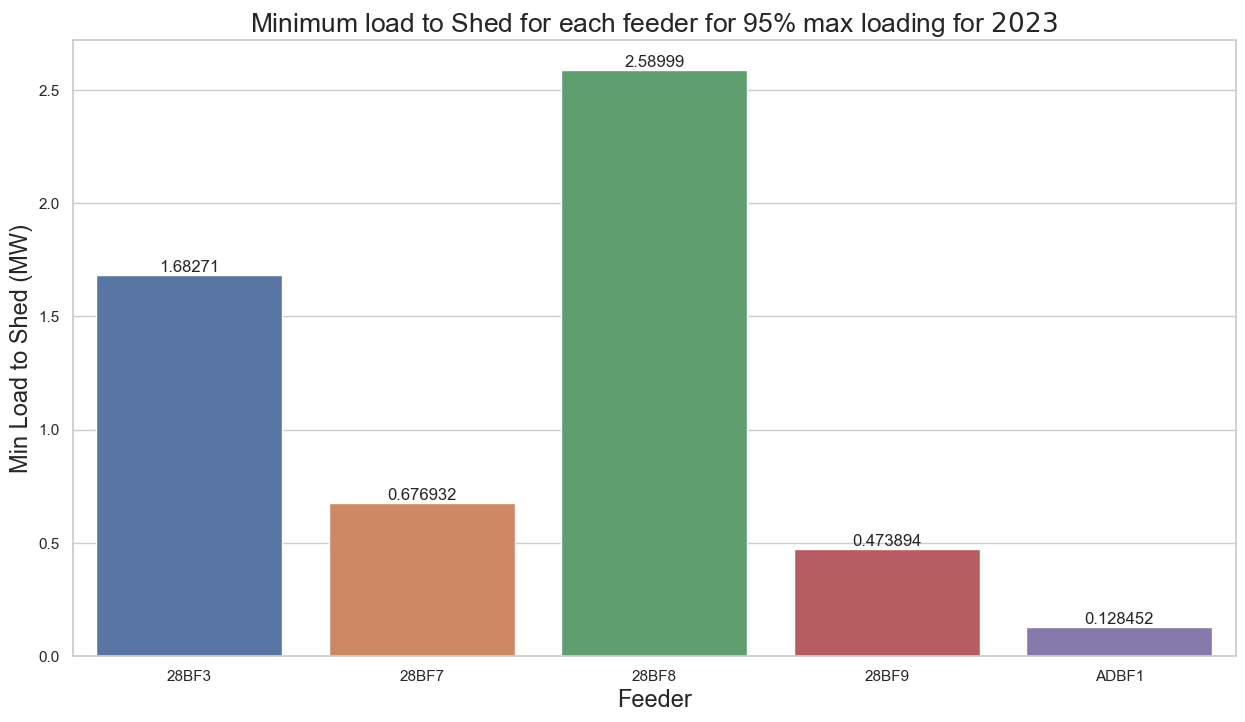

In [189]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Feeder', y='Shed Load (MW)', data=df_load_shed, palette='deep')
ax.bar_label(ax.containers[0], fontsize=12);

plt.title('Minimum load to Shed for each feeder for 95% max loading for ${2023}$', size=19)
plt.xlabel('Feeder', size=17)
plt.ylabel('Min Load to Shed (MW)', size=17)

plt.savefig('minimum_load_to_shed_for_each_feeder_2023.png', dpi=450)
plt.show()

## Analysis for 2022

### Feeder Analysis

In [127]:
cols2 = list(feeder_2022.columns)
for col in cols2:
    print(col)

id
BSP
Alias
Take-Off Cable Size
Material
Voltage (kV)
Ampacity (A)
Medium
Max Rating (MW)
JAN Demand_max (MW)
JAN %Loading
FEB Demand_max (MW)
FEB %Loading
MAR Demand_max (MW)
MAR %Loading
APR Demand_max (MW)
APR %Loading
MAY Demand_max (MW)
MAY %Loading
JUN Demand_max (MW)
JUN %Loading
JUL Demand_max (MW)
JUL %Loading
AUG Demand_max (MW)
AUG %Loading
SEP Demand_max (MW)
SEP %Loading
OCT Demand_max (MW)
OCT %Loading
NOV Demand_max (MW)
NOV %Loading
DEC Demand_max (MW)
DEC %Loading
Q1 Demand_max (MW)
Q1 %Loading
Q2 Demand_max (MW)
Q2 %Loading
Q3 Demand_max (MW)
Q3 %Loading
Q4 Demand_max (MW)
Q4 %Loading
Annual Demand_max (MW)
Annual %Loading


In [128]:
heads22 = [head for head in cols if 'oading' in head]
loading22 = [head.split()[0] for head in cols if 'oading' in head]

In [129]:
loads_2022 = {title: feeder_2022[key] for key, title in zip(heads22, loading22)}

In [130]:
loads_2022 = pd.DataFrame(loads_2022)

In [131]:
loads_2022


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Q1,Q2,Q3,Q4,Annual
FEEDER,,,,,,,,,,,,,,,,,
28BF2,65.079740,81.349676,85.998229,90.646781,83.673952,79.025399,74.376846,85.998229,67.404017,74.376846,74.376846,72.052570,85.998229,90.646781,85.998229,74.376846,90.646781
28BF3,85.998229,97.619611,102.268164,104.592440,102.268164,106.916717,111.565269,95.295334,83.673952,99.943887,92.971058,88.322505,102.268164,106.916717,111.565269,99.943887,111.565269
28BF4,81.042696,103.145249,101.040244,82.095198,79.990193,79.990193,71.570173,67.360163,72.622675,76.832686,73.675178,71.570173,103.145249,82.095198,72.622675,76.832686,82.095198
28BF6,118.051622,108.970728,105.078917,36.323576,38.918117,36.323576,32.431764,33.729035,35.026306,33.729035,33.729035,31.134494,118.051622,38.918117,35.026306,33.729035,38.918117
28BF7,81.728046,108.970728,111.565269,95.998023,93.403481,86.917128,84.322587,81.728046,80.430776,86.917128,84.322587,84.322587,111.565269,95.998023,84.322587,86.917128,95.998023
28BF8,57.473018,74.376846,206.226710,74.376846,70.996081,64.234549,64.234549,64.234549,57.473018,60.853783,60.853783,57.473018,206.226710,74.376846,64.234549,60.853783,74.376846
28BF9,86.305208,105.250254,104.197752,84.200203,79.990193,78.937691,70.517670,68.412665,70.517670,74.727680,73.675178,71.570173,105.250254,84.200203,70.517670,74.727680,84.200203
28BF11,43.152604,50.520122,52.625127,50.520122,49.467619,54.730132,46.310112,43.152604,42.100102,42.100102,42.100102,39.995097,52.625127,54.730132,46.310112,42.100102,54.730132
28YF1,65.569062,80.248703,82.205988,81.227345,81.227345,80.248703,77.312774,77.312774,77.312774,83.184631,80.248703,78.291417,82.205988,81.227345,77.312774,83.184631,83.184631


#### Plots

##### Descriptive plots

In [132]:
monthly_loads_22 = loads_2022[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV']]
quarterly_loads_22 = loads_2022[['Q1', 'Q2', 'Q3', 'Q4', 'Annual']]

In [133]:
mloads22 = monthly_loads_22.transpose(copy=True)
qloads22 = quarterly_loads_22.transpose(copy=True)

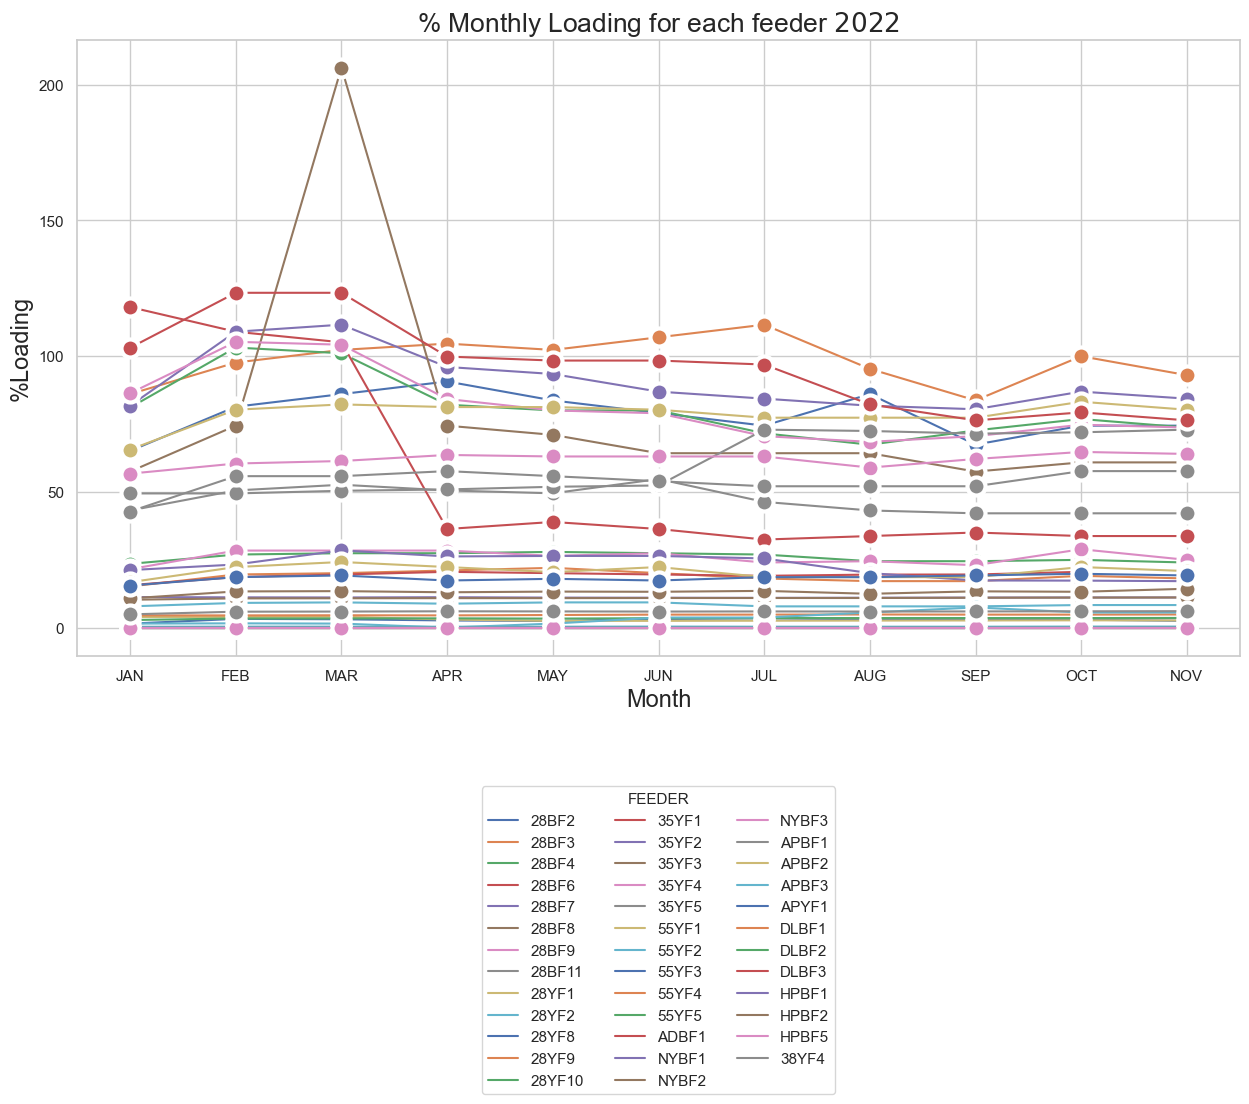

In [134]:
# Create line plots for mloads2
plt.figure(figsize=(15, 8))
sns.lineplot(#x='Month', 
             #y='%Loading', 
             #hue='Treatments',   
             dashes=False, 
             data=mloads22, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('% Monthly Loading for each feeder ${2022}$', size=19)
plt.xlabel('Month', size=17)
plt.ylabel('%Loading', size=17)
plt.legend(title='FEEDER', title_fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.savefig('monthly_feeder_loading_2022.png', dpi=450)
plt.show()

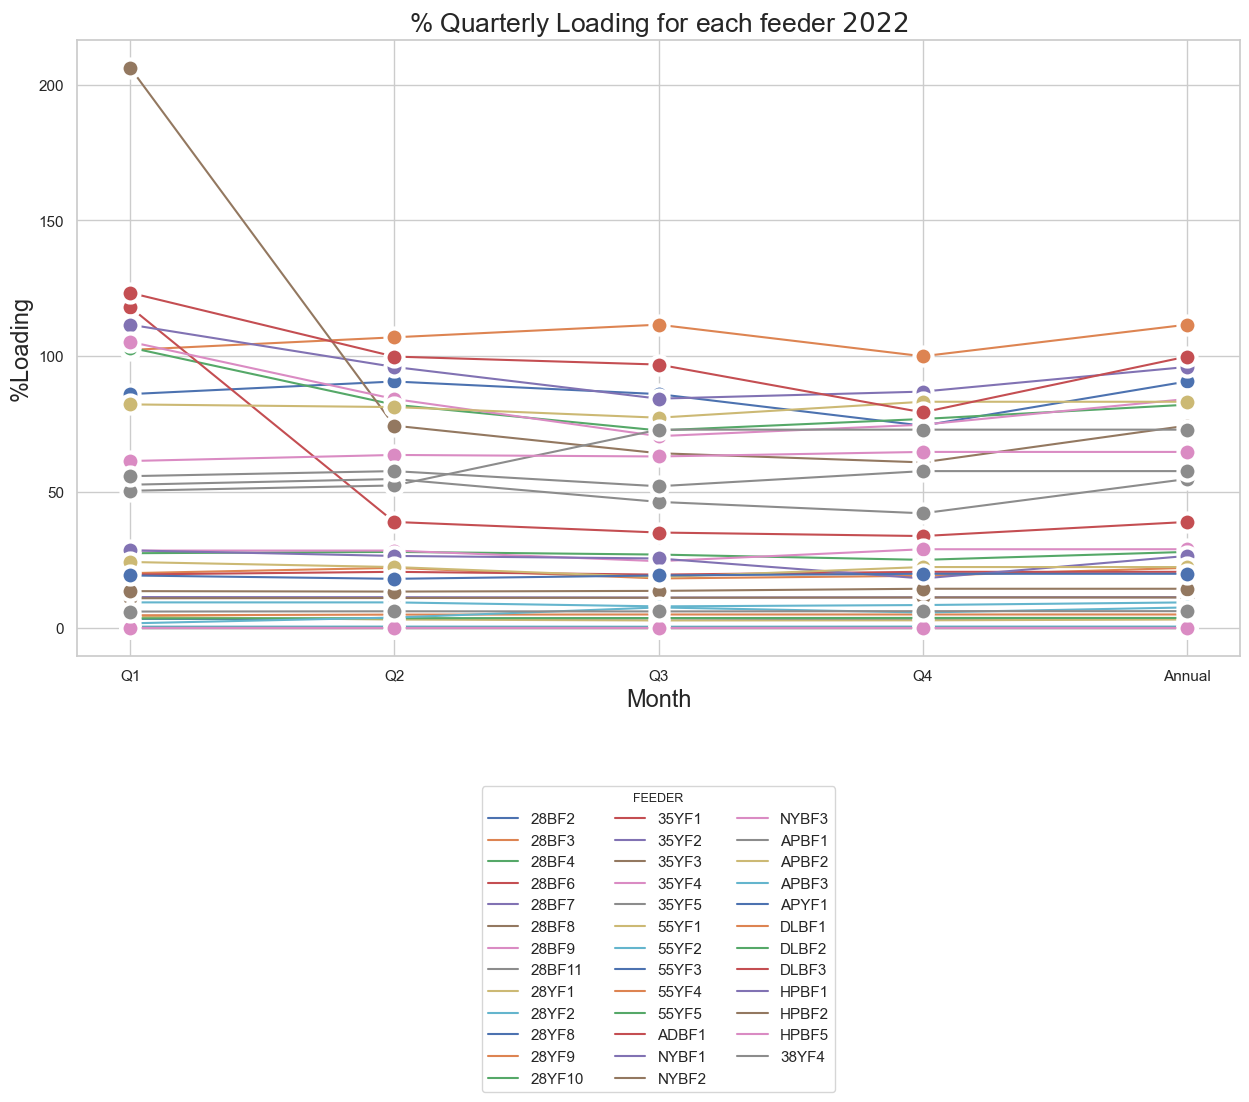

In [135]:
# Create line plots for mloads2
plt.figure(figsize=(15, 8))
sns.lineplot(#x='Month', 
             #y='%Loading', 
             #hue='Treatments',  
             dashes=False,
             data=qloads22, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('% Quarterly Loading for each feeder ${2022}$', size=19)
plt.xlabel('Month', size=17)
plt.ylabel('%Loading', size=17)
plt.legend(title='FEEDER', title_fontsize='9', loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)


plt.savefig('quarterly_feeder_loading_2022.png', dpi=450)
plt.show()

##### Max plots

In [142]:
feeder_2022

,id,BSP,Alias,Take-Off Cable Size,Material,Voltage (kV),Ampacity (A),Medium,Max Rating (MW),JAN Demand_max (MW),...,Q1 Demand_max (MW),Q1 %Loading,Q2 Demand_max (MW),Q2 %Loading,Q3 Demand_max (MW),Q3 %Loading,Q4 Demand_max (MW),Q4 %Loading,Annual Demand_max (MW),Annual %Loading
FEEDER,,,,,,,,,,,,,,,,,,,,,
28BF2,1,Tamale,Tamale,3cX185,Aluminium,11.5,240,Duct,4.302414,2.800,...,3.700,85.998229,3.900,90.646781,3.700,85.998229,3.200,74.376846,3.90,90.646781
28BF3,2,Tamale,Tamale,3cX185,Aluminium,11.5,240,Duct,4.302414,3.700,...,4.400,102.268164,4.600,106.916717,4.800,111.565269,4.300,99.943887,4.80,111.565269
28BF4,3,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,7.700,...,9.800,103.145249,7.800,82.095198,6.900,72.622675,7.300,76.832686,7.80,82.095198
28BF6,4,Tamale,Tamale,1cX500,Aluminium,11.5,430,Duct,7.708492,9.100,...,9.100,118.051622,3.000,38.918117,2.700,35.026306,2.600,33.729035,3.00,38.918117
28BF7,5,Tamale,Tamale,1cX500,Aluminium,11.5,430,Air,7.708492,6.300,...,8.600,111.565269,7.400,95.998023,6.500,84.322587,6.700,86.917128,7.40,95.998023
28BF8,6,Tamale,Tamale,3cX95,Aluminium,11.5,165,Air,2.957910,1.700,...,6.100,206.226710,2.200,74.376846,1.900,64.234549,1.800,60.853783,2.20,74.376846
28BF9,7,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,8.200,...,10.000,105.250254,8.000,84.200203,6.700,70.517670,7.100,74.727680,8.00,84.200203
28BF11,8,Tamale,Tamale,1cX500,Copper,11.5,530,Duct,9.501165,4.100,...,5.000,52.625127,5.200,54.730132,4.400,46.310112,4.000,42.100102,5.20,54.730132
28YF1,9,Tamale,Tamale,1cX240,Copper,34.5,380,Duct,20.436467,13.400,...,16.800,82.205988,16.600,81.227345,15.800,77.312774,17.000,83.184631,17.00,83.184631


In [141]:
mloads22

FEEDER,28BF2,28BF3,28BF4,28BF6,28BF7,28BF8,28BF9,28BF11,28YF1,28YF2,...,APBF2,APBF3,APYF1,DLBF1,DLBF2,DLBF3,HPBF1,HPBF2,HPBF5,38YF4
JAN,65.079740,85.998229,81.042696,118.051622,81.728046,57.473018,86.305208,43.152604,65.569062,7.829142,...,16.734790,1.487537,15.495176,0.0,0.0,0.0,0.0,0.0,0.0,4.893214
FEB,81.349676,97.619611,103.145249,108.970728,108.970728,74.376846,105.250254,50.520122,80.248703,9.101377,...,22.313054,1.580508,18.594212,0.0,0.0,0.0,0.0,0.0,0.0,5.871856
MAR,85.998229,102.268164,101.040244,105.078917,111.565269,206.226710,104.197752,52.625127,82.205988,9.297106,...,24.172475,1.487537,19.214019,0.0,0.0,0.0,0.0,0.0,0.0,5.920788
APR,90.646781,104.592440,82.095198,36.323576,95.998023,74.376846,84.200203,50.520122,81.227345,8.807784,...,22.313054,0.000000,17.354597,0.0,0.0,0.0,0.0,0.0,0.0,6.018653
MAY,83.673952,102.268164,79.990193,38.918117,93.403481,70.996081,79.990193,49.467619,81.227345,9.297106,...,20.453633,1.487537,17.974405,0.0,0.0,0.0,0.0,0.0,0.0,5.969721
JUN,79.025399,106.916717,79.990193,36.323576,86.917128,64.234549,78.937691,54.730132,80.248703,9.297106,...,22.313054,3.718842,17.354597,0.0,0.0,0.0,0.0,0.0,0.0,5.920788
JUL,74.376846,111.565269,71.570173,32.431764,84.322587,64.234549,70.517670,46.310112,77.312774,7.829142,...,18.594212,3.718842,18.594212,0.0,0.0,0.0,0.0,0.0,0.0,5.969721
AUG,85.998229,95.295334,67.360163,33.729035,81.728046,64.234549,68.412665,43.152604,77.312774,7.829142,...,18.594212,5.578263,18.594212,0.0,0.0,0.0,0.0,0.0,0.0,5.920788
SEP,67.404017,83.673952,72.622675,35.026306,80.430776,57.473018,70.517670,42.100102,77.312774,7.829142,...,18.594212,7.437685,19.214019,0.0,0.0,0.0,0.0,0.0,0.0,5.969721
OCT,74.376846,99.943887,76.832686,33.729035,86.917128,60.853783,74.727680,42.100102,83.184631,8.318463,...,22.313054,5.578263,19.833826,0.0,0.0,0.0,0.0,0.0,0.0,6.018653


In [137]:
feeders22 = list(mloads22.columns)
maxs22 = []

In [138]:
for feeder in feeders22:
    maxs22.append(mloads22[feeder].max())

In [139]:
max_load_on_each_feeder22 = {"Feeder":feeders22, "%Loading":maxs22}
maxs_on_feeder22 = pd.DataFrame(max_load_on_each_feeder22)

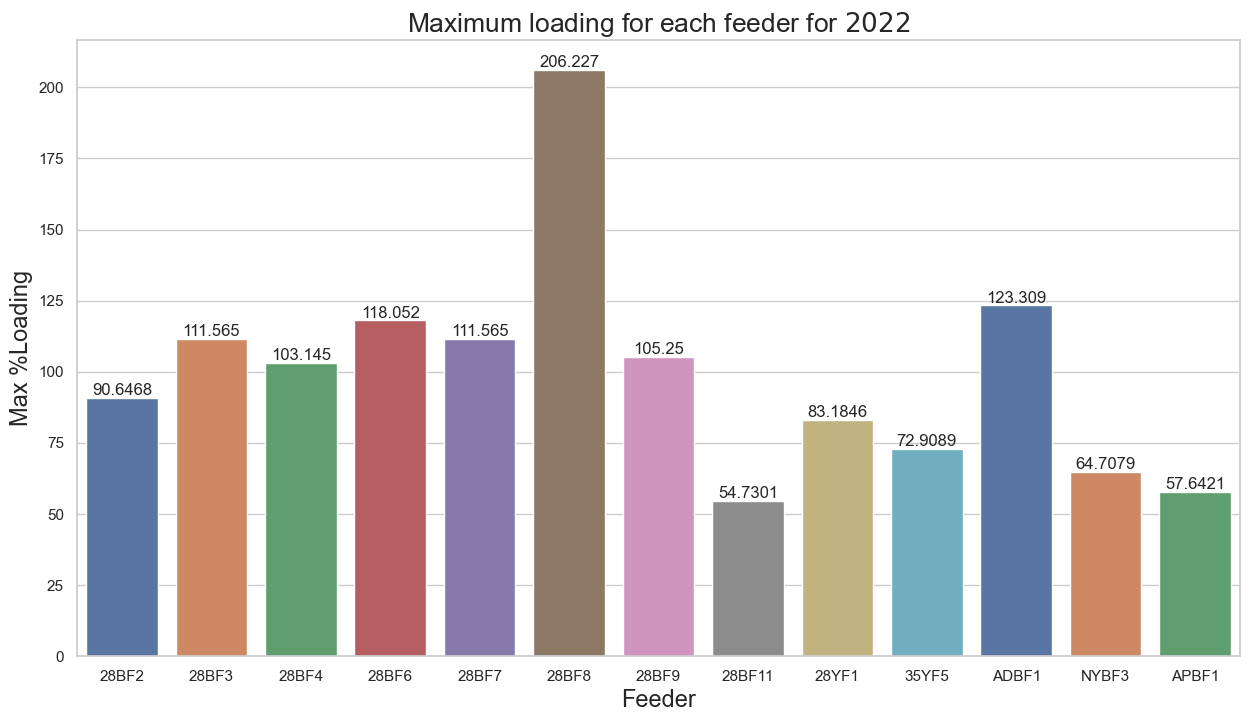

In [140]:
maxs_on_feeder22 = maxs_on_feeder22[maxs_on_feeder22['%Loading'] > 30]
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Feeder', y='%Loading', data=maxs_on_feeder22, palette='deep')
ax.bar_label(ax.containers[0], fontsize=12);

plt.title('Maximum loading for each feeder for ${2022}$', size=19)
plt.xlabel('Feeder', size=17)
plt.ylabel('Max %Loading', size=17)

plt.savefig('maximum_loading_for_each_feeder_2022.png', dpi=450)
plt.show()

#### Excess loads to shed for 2022

In [190]:
feeder_max_22_beyond95 = maxs_on_feeder22[maxs_on_feeder22['%Loading'] > 95]

In [191]:
feeder_max_22_beyond95

,Feeder,%Loading
1,28BF3,111.565269
2,28BF4,103.145249
3,28BF6,118.051622
4,28BF7,111.565269
5,28BF8,206.226710
6,28BF9,105.250254
23,ADBF1,123.308982


In [192]:
demand22 = [demand for demand in cols2 if 'emand' in demand]
demand

['JAN Demand_max (MW)',
 'FEB Demand_max (MW)',
 'MAR Demand_max (MW)',
 'APR Demand_max (MW)',
 'MAY Demand_max (MW)',
 'JUN Demand_max (MW)',
 'JUL Demand_max (MW)',
 'AUG Demand_max (MW)',
 'SEP Demand_max (MW)',
 'OCT Demand_max (MW)',
 'NOV Demand_max (MW)',
 'DEC Demand_max (MW)',
 'Q1 Demand_max (MW)',
 'Q2 Demand_max (MW)',
 'Q3 Demand_max (MW)',
 'Q4 Demand_max (MW)',
 'Annual Demand_max (MW)']

In [193]:
demands22 = {title: feeder_2022[key] for key, title in zip(demand22, loading22)}
demands22

{'JAN': FEEDER
 28BF2      2.800
 28BF3      3.700
 28BF4      7.700
 28BF6      9.100
 28BF7      6.300
 28BF8      1.700
 28BF9      8.200
 28BF11     4.100
 28YF1     13.400
 28YF2      1.600
 28YF8      0.300
 28YF9      3.100
 28YF10     4.800
 35YF1      3.200
 35YF2      2.300
 35YF3      2.100
 35YF4      4.400
 35YF5     10.100
 55YF1      0.797
 55YF2      0.065
 55YF3        NaN
 55YF4      0.920
 55YF5      0.570
 ADBF1      7.020
 NYBF1      1.140
 NYBF2      0.579
 NYBF3      3.050
 APBF1      2.300
 APBF2      0.900
 APBF3      0.080
 APYF1      2.500
 DLBF1        NaN
 DLBF2        NaN
 DLBF3        NaN
 HPBF1        NaN
 HPBF2        NaN
 HPBF5        NaN
 38YF4      1.000
 Name: JAN Demand_max (MW), dtype: float64,
 'FEB': FEEDER
 28BF2      3.500
 28BF3      4.200
 28BF4      9.800
 28BF6      8.400
 28BF7      8.400
 28BF8      2.200
 28BF9     10.000
 28BF11     4.800
 28YF1     16.400
 28YF2      1.860
 28YF8      0.660
 28YF9      4.000
 28YF10     5.500
 35YF1  

In [195]:
demands22 = pd.DataFrame(demands22)

In [196]:
demands22 = demands22.fillna('0.00')

In [197]:
monthly_demands22 = demands22[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV']]
quarterly_demands22 = demands22[['Q1', 'Q2', 'Q3', 'Q4', 'Annual']]

In [198]:
mdemands22 = monthly_demands22.transpose()

In [199]:
demand_max_22_beyond95 = [mdemands22[mx].max() for mx in feeder_max_22_beyond95['Feeder']]

In [200]:
demand_max_22_beyond95

[4.8, 9.8, 9.1, 8.6, 6.1, 10.0, 8.4]

In [201]:
loading_max_22_beyond95 = list(feeder_max_22_beyond95['%Loading'])

In [202]:
loading_max_22_beyond95

[111.56526940862335,
 103.14524907589704,
 118.0516222812177,
 111.56526940862332,
 206.2267101189704,
 105.25025415907861,
 123.3089819779521]

In [203]:
# Evaluating the excess loads to be shed
load_to_be_shed_22 = []
for i in range(7):
    excess_loading = loading_max_22_beyond95[i]
    demand_at_excess = demand_max_22_beyond95[i]
    load_to_be_shed_22.append(((excess_loading - 95)/excess_loading) * demand_at_excess)

In [204]:
load_to_be_shed_22

[0.7127065042989639,
 0.773893530326877,
 1.776932486868975,
 1.276932486868975,
 3.289985721705537,
 0.9738935303268764,
 1.928451965140025]

In [205]:
feeders_at_max_22 = list(feeder_max_22_beyond95['Feeder'])

In [206]:
df_load_shed22 = {'Feeder':feeders_at_max_22, 'Shed Load (MW)':load_to_be_shed_22}
df_load_shed22 = pd.DataFrame(df_load_shed22)
df_load_shed22

,Feeder,Shed Load (MW)
0,28BF3,0.712707
1,28BF4,0.773894
2,28BF6,1.776932
3,28BF7,1.276932
4,28BF8,3.289986
5,28BF9,0.973894
6,ADBF1,1.928452


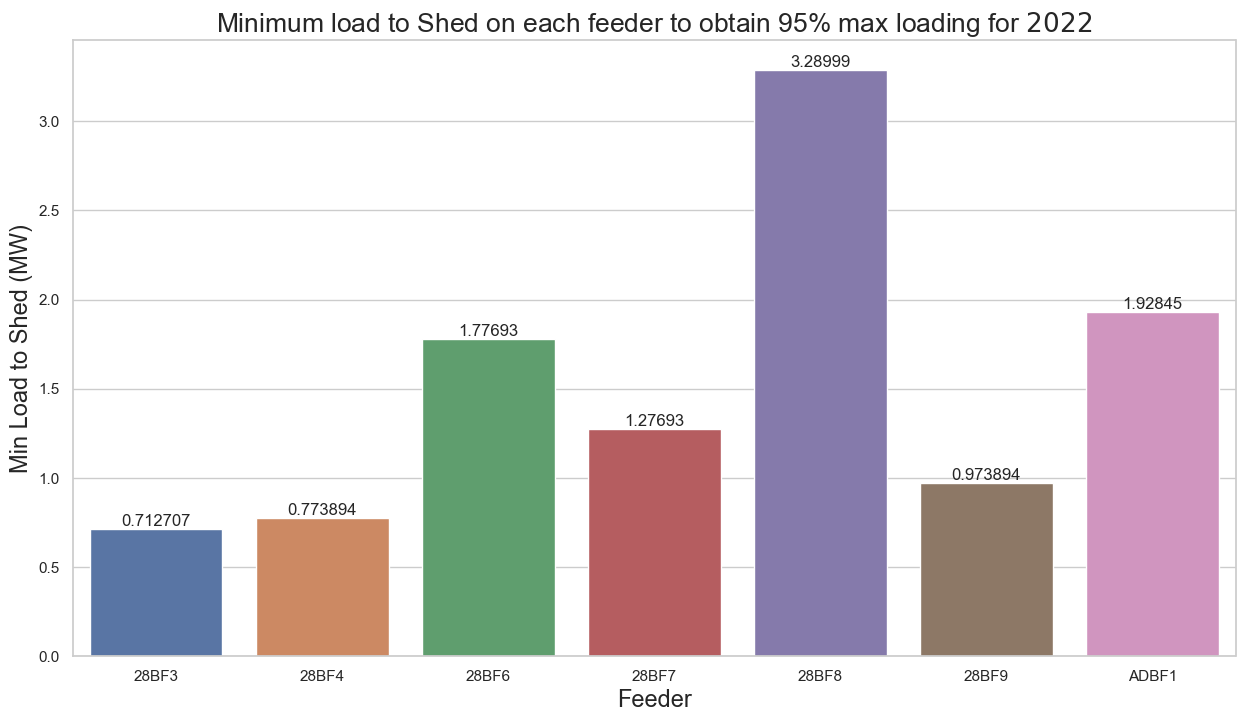

In [207]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Feeder', y='Shed Load (MW)', data=df_load_shed22, palette='deep')
ax.bar_label(ax.containers[0], fontsize=12);

plt.title('Minimum load to Shed on each feeder to obtain 95% max loading for ${2022}$', size=19)
plt.xlabel('Feeder', size=17)
plt.ylabel('Min Load to Shed (MW)', size=17)

plt.savefig('minimum_load_to_shed_for_each_feeder_2022.png', dpi=450)
plt.show()